# Introduction to neural network classification with tensorflow

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating Data to view and fit

In [34]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=1)

In [35]:
# Check the data
X

array([[ 0.83619806,  0.03563148],
       [-0.53059757, -0.6487148 ],
       [ 0.85386881, -0.61156583],
       ...,
       [ 0.31778957, -0.70184206],
       [-0.96610964,  0.15124699],
       [ 0.93619574,  0.47850311]])

In [36]:
# Check the labels
y[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

Our data is a little hard to understand right now... Let's visualize it

In [37]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.836198,0.035631,1
1,-0.530598,-0.648715,1
2,0.853869,-0.611566,0
3,-0.092147,-0.965144,0
4,-1.001623,0.144467,0
...,...,...,...
995,-0.746937,-0.210731,1
996,0.645063,0.790745,0
997,0.317790,-0.701842,1
998,-0.966110,0.151247,0


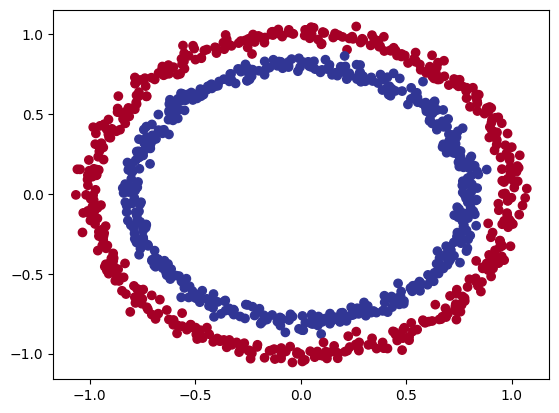

In [38]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [39]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [40]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model = Sequential([
    Dense(12, activation="relu"), # Relu used for handling non-linearity
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid") # Sigmoid for 0/1 type of answer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["accuracy"])

# 3. Fit the model
history = model.fit(X, y, epochs=50, verbose=0)

In [41]:
# Evaluate the model
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0113


[0.009845530614256859, 0.9980000257492065]



```
# This is formatted as code
```

### We got 100% accuracy

Text(0, 0.5, 'Loss')

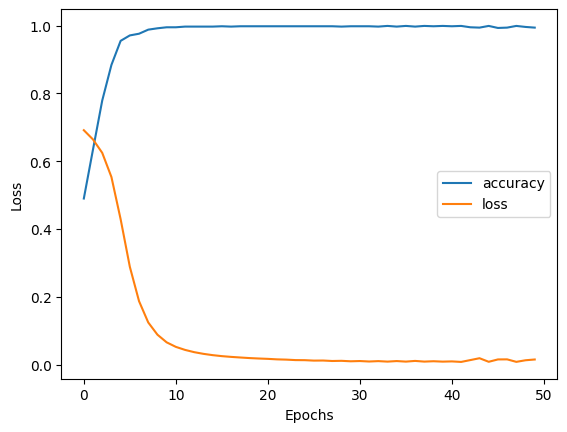

In [42]:
# Visualize the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

### Plot the decision boundary

In [43]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass classification problem
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Doing binary classification


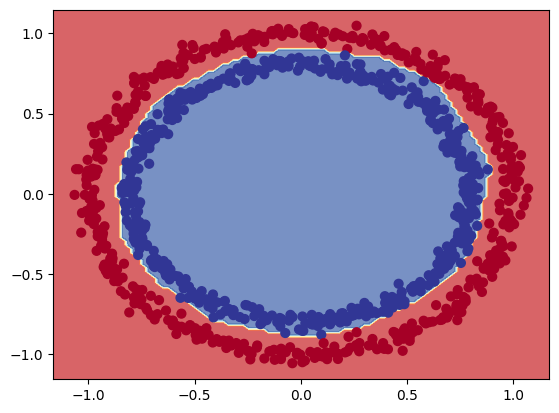

In [44]:
# Check out the predictions our model is making
plot_decision_boundary(model, X=X, y=y)

### Create a toy tensor (similar to data we pass into the models)

In [45]:
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

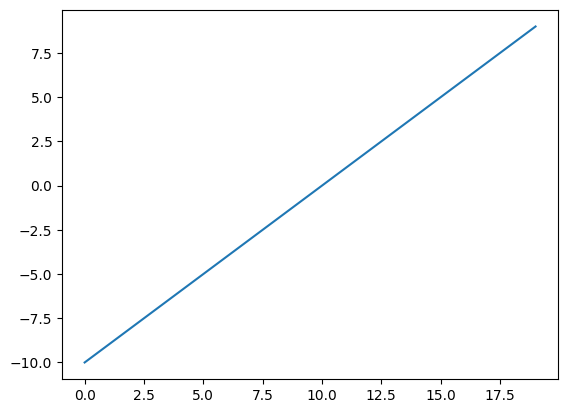

In [46]:
# Visualize our toy tensor
plt.plot(A)

In [47]:
# Let's start by replicating our sigmoid function : sig(x) = 1 / (1 + exp(x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

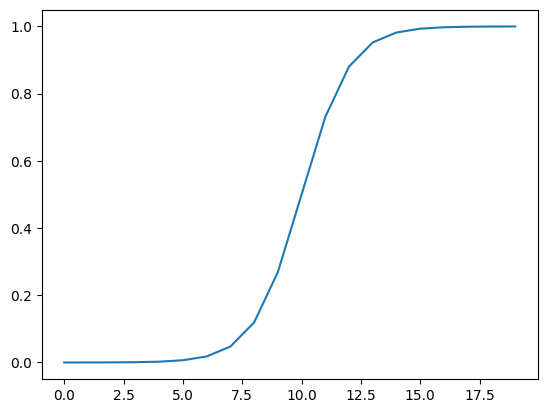

In [48]:
# Plot our toy tensor transformed by sigmoid function
plt.plot(sigmoid(A))

In [53]:
# Let's create the ReLU function
def relu(x):
  return tf.maximum(0, x)

# Use the ReLU function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

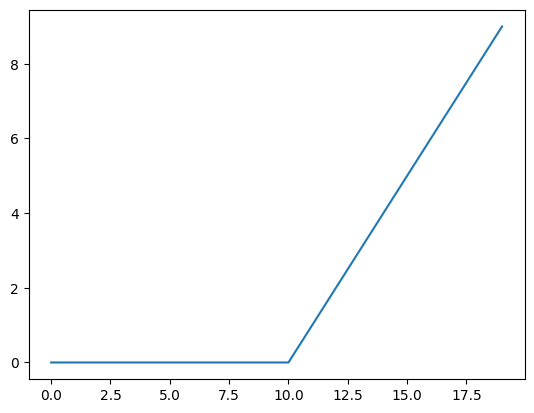

In [54]:
# Plot our toy tensor transformed by ReLU function
plt.plot(relu(A))

In [55]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

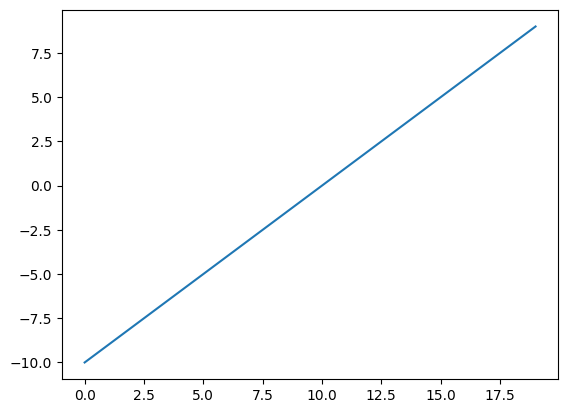

In [56]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [57]:
# Does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our model
So far, we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [58]:
# Check how many samples we have
len(X)

1000

In [59]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(800, 200)

In [74]:
### Let's recreate a model to fit on training data and evaluate on testing data
tf.random.set_seed(42)

# 1. Build a model
model = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

# 2. Compile our model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

# 3. Fit our model
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [75]:
# 4. Evaluate our model
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0397  


[0.03999028354883194, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


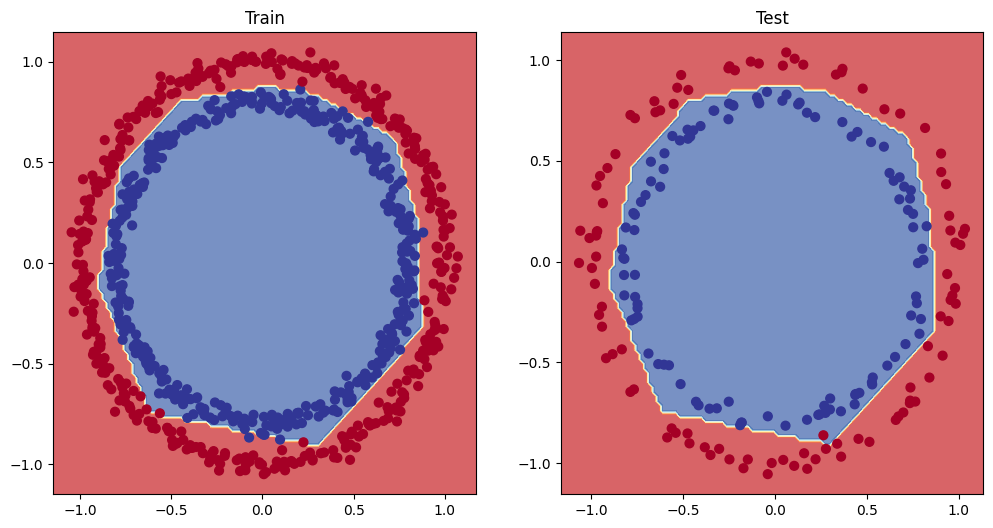

In [76]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

<Axes: >

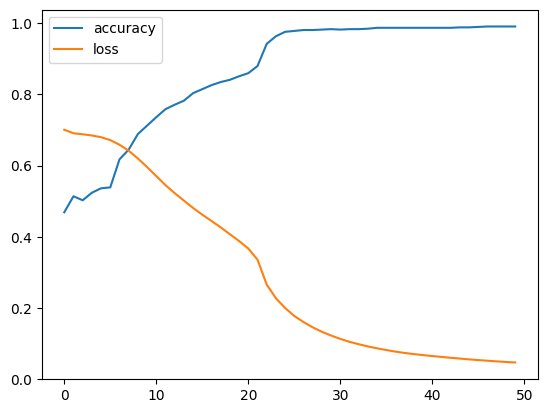

In [77]:
# Plot the loss curve
pd.DataFrame(history.history).plot()

🔑 **NOTE :** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model while training.
* Another model (we could use the same one as above, but we're practising building models here)
* A modified loss curves plot.

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as previous)
model = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# 4. Fit the model (passing lr_scheduler callback)
history = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5299 - loss: 0.6876 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 0.6871 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5299 - loss: 0.6867 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.6862 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5314 - loss: 0.6856 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 0.6851 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5249 - loss: 0.6845 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.6840 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 0.6834 - learning_

<Axes: xlabel='epochs'>

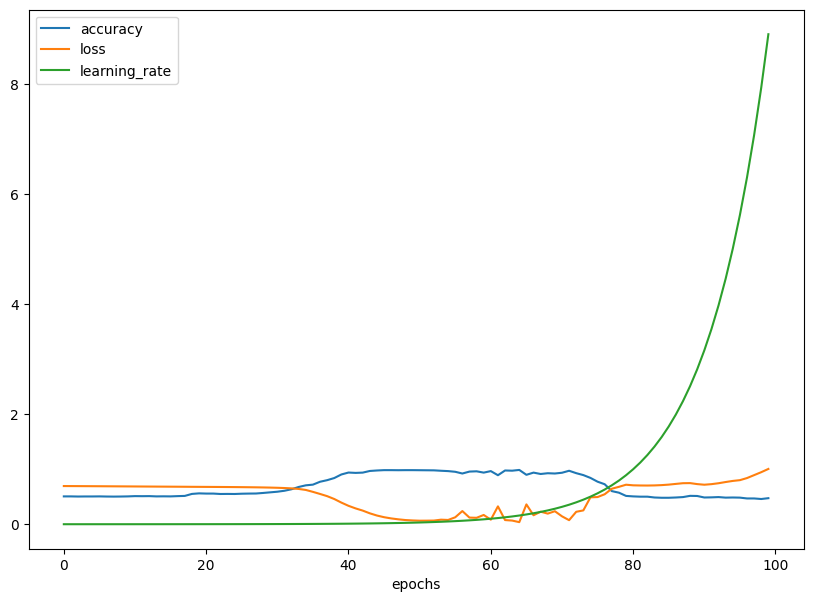

In [81]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

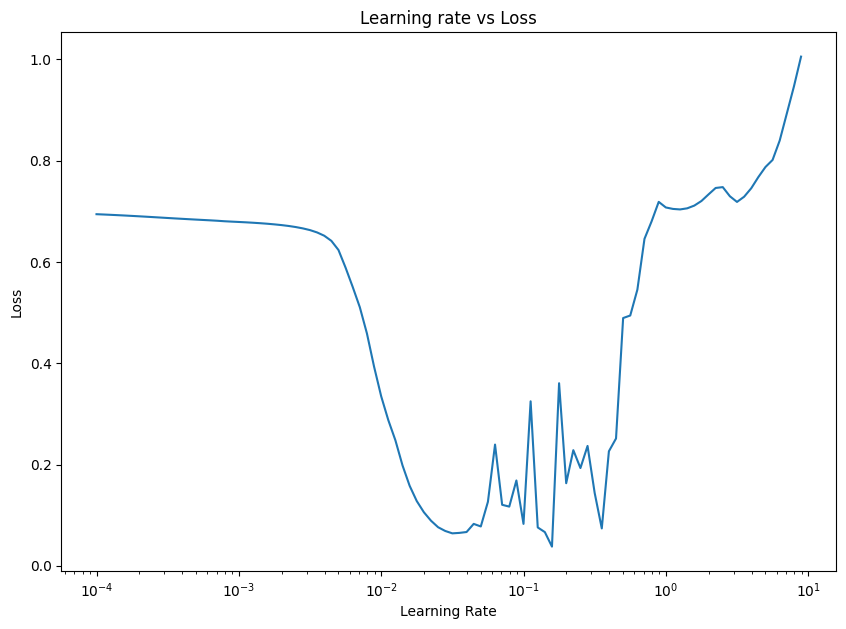

In [83]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [86]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [87]:
# Ideal learning rate according to the plot above:
0.02

0.02

In [94]:
# Let's build a model using the ideal learning rate
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as previous)
model = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), metrics=["accuracy"])

# 3. Fit the model for 60 epochs
history = model.fit(X_train, y_train, epochs=60, verbose=0)

In [95]:
# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0224  


[0.023170895874500275, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


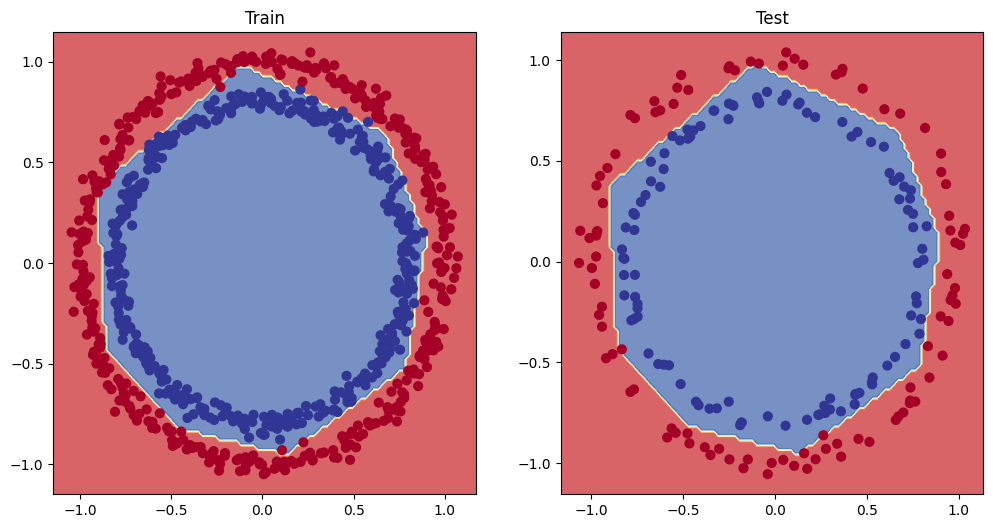

In [96]:
# Plot the decision boundaries for train and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## More classification evaluation methods
Alongside visualizing our model results as much as possible, there are handful of other classification evaluation methods we can use to evaluate our model.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [97]:
# Check our model's accuracy
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0224 


0.9900000095367432

In [105]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [106]:
# Convert prediction probablities to binary format and view first 10
y_pred = tf.round(y_pred)
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [107]:
# Again check for the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 95,   2],
       [  0, 103]])

How about we prettify our confusion matrix?

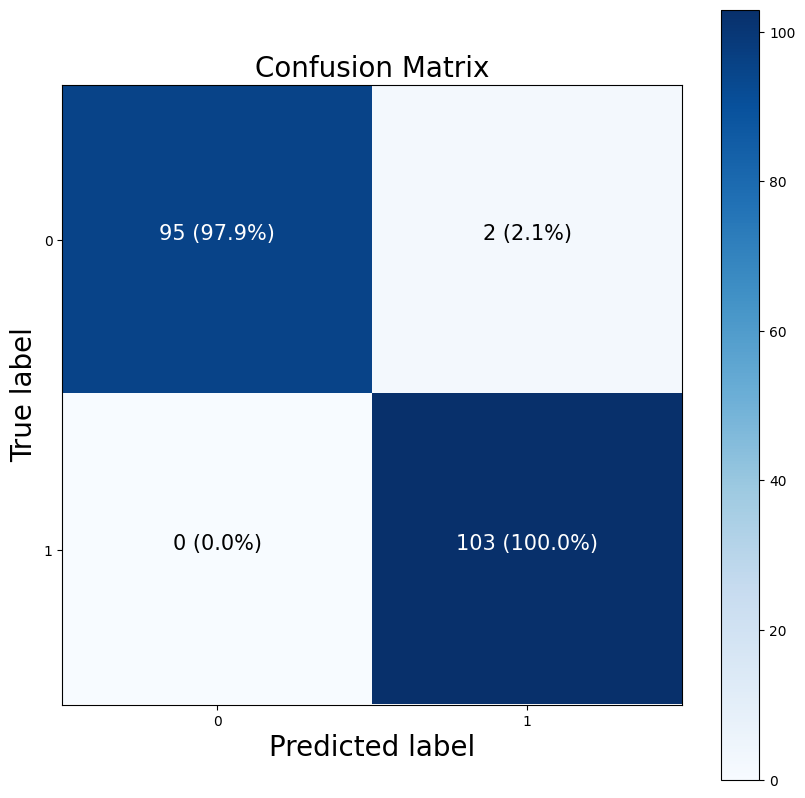

In [112]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with larger example (Multiclass classification)
* when you more have more than two classes as an option, it is called multiclass classification.

* To practice multiclass classification, we're going to build a neural network to classify images of different items of clothing.

In [114]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [115]:
# Show the first training example
X_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [117]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

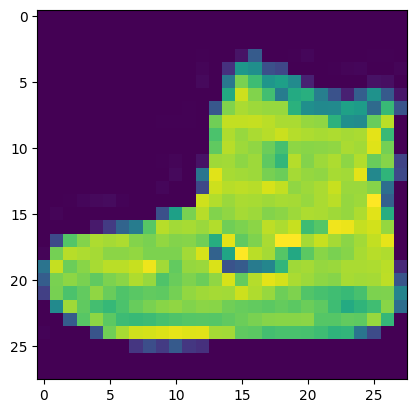

In [121]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(X_train[0]);

In [122]:
# Check out sample label
y_train[0]

9

In [123]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

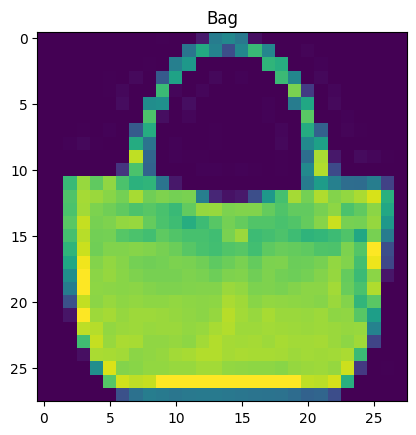

In [126]:
# Plot an example image with its label
index_of_choice = 100
plt.imshow(X_train[index_of_choice])
plt.title(class_names[y_train[index_of_choice]]);

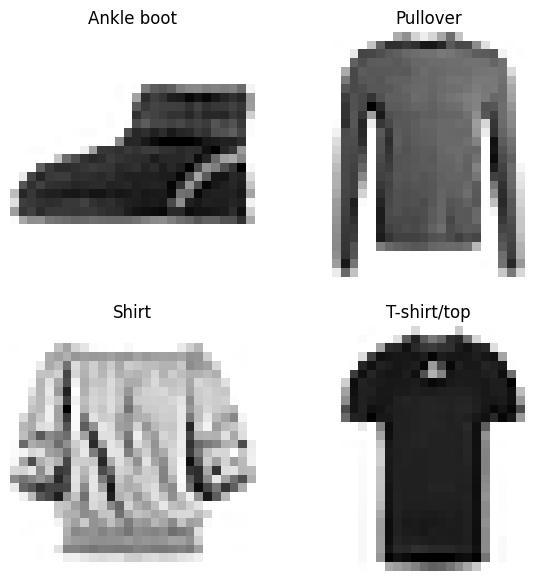

In [130]:
# Plot multiple random images of fashion_mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[random_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[random_index]])
  plt.axis(False)

## Building a multiclass classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however we have to tweak a few things:
* Input shape = 28 * 28 (shape of the image)
* Output shape = 10 (one per class of clothing)
* Loss function = "categorical_crossentropy"
* Output layer activation = "softmax"

In [133]:
flatten_model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
])
flatten_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [134]:
28*28

784

In [137]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = Sequential([
    Flatten(input_shape=(28, 28)), # our data needs to be flattened (from 28*28 to 784)
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax")
])

# 2. Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4022 - loss: 1.3561 - val_accuracy: 0.4078 - val_loss: 1.3448
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4036 - loss: 1.3645 - val_accuracy: 0.3597 - val_loss: 1.5373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3763 - loss: 1.4514 - val_accuracy: 0.4050 - val_loss: 1.3530
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4034 - loss: 1.3593 - val_accuracy: 0.3867 - val_loss: 1.4226
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3903 - loss: 1.3932 - val_accuracy: 0.4032 - val_loss: 1.3493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4034 - loss: 1.3464 - val_accuracy: 0.4074 - val_loss: 1.3467
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4056 - loss: 1.3431 - val_accuracy: 0.3982 - val_loss: 1.3577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4014 - loss: 1.3526 - 

In [138]:
# Check the model summary
model_1.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Check the min and max values of the training data
print(f"Min of X_train: {np.min(X_train)}")
print(f"Max of X_train: {np.max(X_train)}")

Min of X_train: 0
Max of X_train: 255


Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensors they try to find patterns between 0 and 1.

In [140]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum value (255)
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0
print(f"Min of X_train: {np.min(X_train_norm)}")
print(f"Max of X_train: {np.max(X_train_norm)}")

Min of X_train: 0.0
Max of X_train: 1.0


In [144]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax")
])

# 2. Compile the model
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Fit the model
norm_history = model_2.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4136 - loss: 1.4717 - val_accuracy: 0.6640 - val_loss: 0.8720
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6772 - loss: 0.8403 - val_accuracy: 0.6976 - val_loss: 0.7870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7060 - loss: 0.7668 - val_accuracy: 0.7081 - val_loss: 0.7434
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7209 - loss: 0.7247 - val_accuracy: 0.7206 - val_loss: 0.7144
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7335 - loss: 0.6973 - val_accuracy: 0.7254 - val_loss: 0.6977
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7389 - loss: 0.6809 - val_accuracy: 0.7290 - val_loss: 0.6880
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7449 - loss: 0.6688 - val_accuracy: 0.7349 - val_loss: 0.6812
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7488 - loss: 0.6603 - 

> 🔑 **Note :** Neural networks tends to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

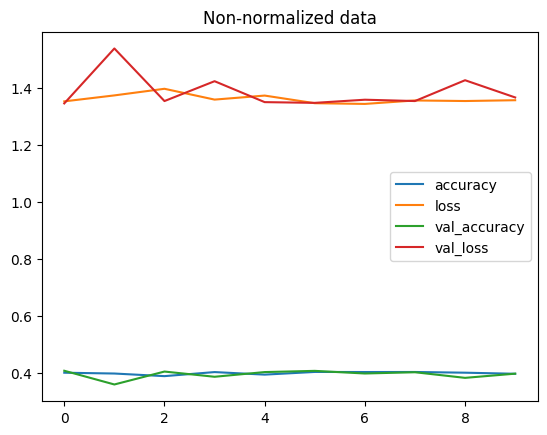

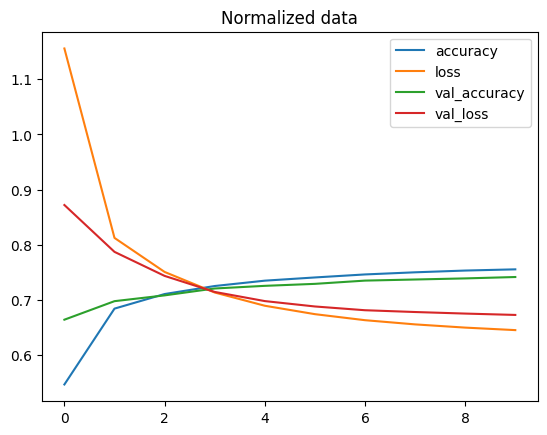

In [146]:
import pandas as pd

# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plt normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data");


> 🔑 **Note :** The same model with even *slightly* different data can produced *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on same criteria (e.g. same architecture but different data or different architecture but same data).

## Finding the ideal learning rate

In [149]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax")
])

# 2. Compile the model
model_3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_3.fit(X_train_norm, y_train, epochs=40, validation_data=(X_test_norm, y_test), callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4638 - loss: 1.3923 - val_accuracy: 0.7500 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7563 - loss: 0.7267 - val_accuracy: 0.7721 - val_loss: 0.6788 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7750 - loss: 0.6614 - val_accuracy: 0.7777 - val_loss: 0.6509 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7822 - loss: 0.6331 - val_accuracy: 0.7812 - val_loss: 0.6361 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7870 - loss: 0.6153 - val_accuracy: 0.7879 - val_loss: 0.6225 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7909 - loss: 0.6017 - val_accuracy: 0.7909 - val_loss: 0.6091 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7963 - l

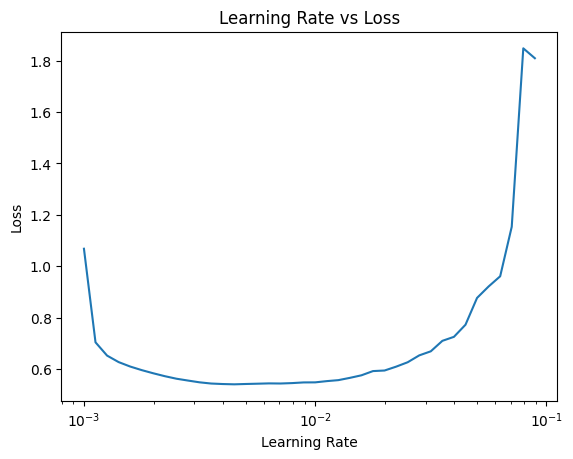

In [150]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [151]:
print("Ideal learning rate: 0.001")

Ideal learning rate: 0.001


In [152]:
# Let's refit a model with ideal learning rate
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax")
])

# 2. Compile the model
model_4.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# 3. Fit the model
norm_history = model_4.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3367 - loss: 1.8056 - val_accuracy: 0.5339 - val_loss: 1.3021
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5563 - loss: 1.2128 - val_accuracy: 0.6466 - val_loss: 0.9806
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6693 - loss: 0.9411 - val_accuracy: 0.6753 - val_loss: 0.8905
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6911 - loss: 0.8626 - val_accuracy: 0.6878 - val_loss: 0.8264
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7100 - loss: 0.7797 - val_accuracy: 0.7096 - val_loss: 0.7629
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7223 - loss: 0.7267 - val_accuracy: 0.7207 - val_loss: 0.7317
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7374 - loss: 0.6973 - val_accuracy: 0.7446 - val_loss: 0.7055
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7524 - loss: 0.6712 - 

## Evaluating our multi-class classification model

In [154]:
model_4.evaluate(X_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.6061


[0.6206150650978088, 0.791700005531311]

>🔑 **Note :** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

How about we create a fun little function:
* Plot a random image
* Make a prediction on said image
* Label the plot with truth label & the predicted label

In [155]:
import random

def plot_random_image(model, images, true_labels, classes):
  # set up random integer
  i = random.randint(0, len(images)-1)

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot image & labels
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel info (prediction/true_label)
  plt.xlabel(f"Pred: {pred_label} ({pred_probs.max():.2f}) - True: {true_label}", color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


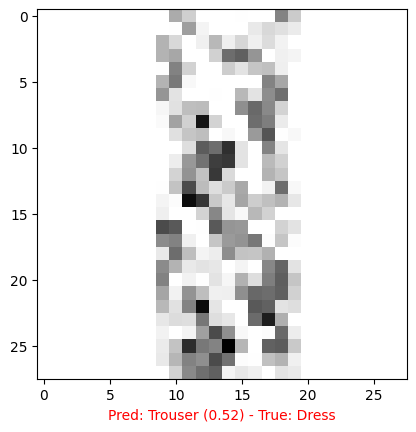

In [166]:
# Check out a random image as well as its prediction
plot_random_image(model_4, X_test_norm, y_test, class_names)


## What pattern is our model learning

In [167]:
# Find the layers of our most recent model
model_4.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_81, built=True>,
 <Dense name=dense_82, built=True>,
 <Dense name=dense_83, built=True>]

In [169]:
# Extract a particular layer
model_4.layers[1]

<Dense name=dense_81, built=True>

In [170]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shape
weights, weights.shape

(array([[ 5.1603578e-02, -4.3468809e-01,  3.7063107e-02, -5.6030101e-01],
        [ 4.1719103e-01, -2.0025288e-01, -7.9977542e-02, -6.5512168e-01],
        [ 1.1117693e+00,  5.0162470e-01,  5.3068623e-03, -1.1160631e+00],
        ...,
        [ 8.2717001e-02, -8.8452145e-02,  1.3996407e-02, -2.4859670e-01],
        [-5.9554327e-01, -7.4813467e-01, -4.5106784e-03, -7.0524246e-02],
        [ 4.8930469e-01,  1.5053299e-01,  1.1077225e-03, -3.8109547e-01]],
       dtype=float32),
 (784, 4))

### Now check out the bias vector...

In [171]:
# Bias and biases shape
biases, biases.shape

(array([ 2.1560771 ,  1.4135858 , -0.02920214,  2.0002356 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (atleast in the case of a tensorflow dense layer).

The bias vector dictate how much the patterns within the corresponding weights matrix should influence the next layer.